*Python Machine Learning 2nd Edition* by [Sebastian Raschka](https://sebastianraschka.com), Packt Publishing Ltd. 2017

Code Repository: https://github.com/rasbt/python-machine-learning-book-2nd-edition

Code License: [MIT License](https://github.com/rasbt/python-machine-learning-book-2nd-edition/blob/master/LICENSE.txt)

### attempting to follow perceptron basic setup shown in textbook:

...let's just skim through it and see if we can get something that works

In [22]:
# implementation of perceptron from textbook:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

class Perceptron(object):
    """
    parameters:
    eta: learning rate
    n_iter: number of iterations/epochs/cycles
    random_state: who cares?
    
    attributes:
    w_: weights after fitting
    errors_: number of misclassifications in a given epoch
    
    """
    
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta=eta
        self.n_iter=n_iter
        self.random_state=random_state
    def fit(self, X, y):
        """
        fit the training data here i guess.
        
        parameters:
        X: array like thing, shape = [n_samples, n_features]
        
        y: array like thing, shape - [n_samples]
        
        returns:
        self : object
        """
        rgen=np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    def net_input(self, X):
        """calc net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        """ return class label after unit step """
        return np.where(self.net_input(X) >= 0.0, 1, -1)


In [23]:
# here's where we grab the actual orchid data we're using from:
import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/ml/'
        'machine-learning-databases/iris/iris.data', header=None)
#df
df.head()

# .......and if we were using a LOCAL folder as a source of our data, we'd say THIS instead:
# df = pd.read_csv('your/local/path/to/iris.data', header=None)



,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [24]:
# ==================================================================
# post-panda data prep:
%matplotlib inline
# select Virginica and versicolor
y = df.iloc[:, 4].values
y = np.where(y == 'Iris-Virginica', -1, 1)

# extract two features: sepal length and petal length
X = df.iloc[:, [0, 2]].values


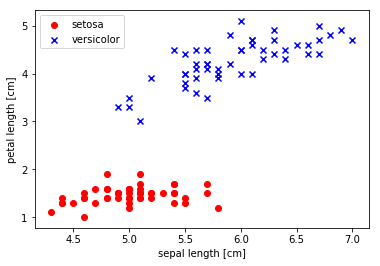

In [25]:
# ==================================================================
# now to PLOT:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# plot data
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='versicolor')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

# plt.savefig('images/02_06.png', dpi=300)
plt.show()


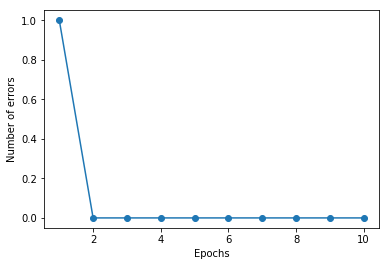

In [26]:
# perceptron model to classifiy 
# Set eta = 0.1 and use 10 epochs
# Plot the misclassification errors over those 10 epochs

# =================================================================
# train first (for 10 iterations):
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)

# =================================================================
# plot the number of errors we got over those 10 cycles, to see if the error diminishes at all:
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of errors')

# plt.savefig('images/02_07.png', dpi=300)
plt.show()